# EDA paired concatenated

First we do some cleaning of the dataset because there are some unused columns.

In [1022]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wandb
import os

In [1023]:
'''
# -----------------------------------------------------------------------------
# W&B Setup
# -----------------------------------------------------------------------------
PROJECT_NAME = "BA_Project_ZHAW"
print(f"PROJECT_NAME: {PROJECT_NAME}")
run = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")
config = wandb.config


# Download corresponding artifact (= dataset) from W&B
precision = "allele" # gene or allele
levenshtein_data_path = f"../../data/EDA/paired/"
download_path = "../../data/WnB_Download/paired"
output_path = f'../../data/EDA/paired/'
output_file_name = f'paired_{precision}_levenshtein.tsv'
dataset_name = f"paired_{precision}"
artifact = run.use_artifact(f"{dataset_name}:latest")
data_dir = artifact.download(download_path)

run.finish()
'''

'\n# -----------------------------------------------------------------------------\n# W&B Setup\n# -----------------------------------------------------------------------------\nPROJECT_NAME = "BA_Project_ZHAW"\nprint(f"PROJECT_NAME: {PROJECT_NAME}")\nrun = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")\nconfig = wandb.config\n\n\n# Download corresponding artifact (= dataset) from W&B\nprecision = "allele" # gene or allele\nlevenshtein_data_path = f"../../data/EDA/paired/"\ndownload_path = "../../data/WnB_Download/paired"\noutput_path = f\'../../data/EDA/paired/\'\noutput_file_name = f\'paired_{precision}_levenshtein.tsv\'\ndataset_name = f"paired_{precision}"\nartifact = run.use_artifact(f"{dataset_name}:latest")\ndata_dir = artifact.download(download_path)\n\nrun.finish()\n'

In [1024]:
precision = 'gene' # don't touch pls
otherprecision = 'allele'
data_dir = '../../data/WnB_Download'
EDA_data_path = '../../data/EDA'
positive_only_data_path_gene = f'../../data/EDA/paired/paired_{precision}_positive_only.tsv'
positive_only_data_path_allele = f'../../data/EDA/paired/paired_{otherprecision}_positive_only.tsv'
positive_only_data_path_beta_allele = f'../../data/EDA/beta/beta_allele_positive_only.tsv'
positive_only_data_path_beta_gene = f'../../data/EDA/beta/beta_gene_positive_only.tsv'

paired_gene_color = 'darkorange'
paired_gene_marker = 'v'
paired_allele_color = 'yellow'
paired_allele_marker = '^'
beta_allele_color = 'midnightblue'
beta_allele_marker = 'X'
beta_gene_color = 'deepskyblue'
beta_gene_marker = 'd'

df_paired_gene = pd.read_csv(positive_only_data_path_gene, sep="\t")
df_paired_allele = pd.read_csv(positive_only_data_path_allele, sep="\t")
df_beta_gene = pd.read_csv(positive_only_data_path_beta_gene, sep="\t")
df_beta_allele = pd.read_csv(positive_only_data_path_beta_allele, sep="\t")

C:\Users\egger\AppData\Local\Temp\ipykernel_5864\1153739544.py:22: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_beta_allele = pd.read_csv(positive_only_data_path_beta_allele, sep="\t")


## Levenshtein

In [1025]:
df_levenshtein_paired_gene = pd.read_csv(f"{EDA_data_path}/paired/paired_gene_levenshtein.tsv", sep="\t")
df_levenshtein_paired_allele = pd.read_csv(f"{EDA_data_path}/paired/paired_allele_levenshtein.tsv", sep="\t")
df_levenshtein_paired_gene_reclassified = pd.read_csv(f"{EDA_data_path}/paired/paired_gene_levenshtein_reclassified.tsv", sep="\t")
df_levenshtein_paired_allele_reclassified = pd.read_csv(f"{EDA_data_path}/paired/paired_allele_levenshtein_reclassified.tsv", sep="\t")
df_levenshtein_beta_gene = pd.read_csv(f"{EDA_data_path}/beta/beta_gene_levenshtein.tsv", sep="\t")
df_levenshtein_beta_allele = pd.read_csv(f"{EDA_data_path}/beta/beta_allele_levenshtein.tsv", sep="\t")

alpha_chain_cdr = 'Min Levenshtein Distance (α-chain CDR3)'
beta_chain_cdr = 'Min Levenshtein Distance (β-chain CDR3)'

column_rename_map = {
    'min_levenshtein_cdr_beta_to_seen': beta_chain_cdr,
    'min_levenshtein_cdr_alpha_to_seen': alpha_chain_cdr,
}

column_rename_map_beta = {
    'min_levenshtein_cdr_to_seen': beta_chain_cdr,
}

df_levenshtein_paired_gene.rename(columns=column_rename_map, inplace=True)
df_levenshtein_paired_allele.rename(columns=column_rename_map, inplace=True)
df_levenshtein_paired_gene_reclassified.rename(columns=column_rename_map, inplace=True)
df_levenshtein_paired_allele_reclassified.rename(columns=column_rename_map, inplace=True)
df_levenshtein_beta_gene.rename(columns=column_rename_map_beta, inplace=True)
df_levenshtein_beta_allele.rename(columns=column_rename_map_beta, inplace=True)

In [1026]:
def get_tpp_count(name, df):
  len_tpp1 = len(df[df["task"] == "TPP1"])
  len_tpp2 = len(df[df["task"] == "TPP2"])
  len_tpp3 = len(df[df["task"] == "TPP3"])
  len_tpp4 = len(df[df["task"] == "TPP4"])
  print(f"========{name}=======")
  print(f"TPP1: {len_tpp1}")
  print(f"TPP2: {len_tpp2}")
  print(f"TPP3: {len_tpp3}")
  print(f"TPP4: {len_tpp4}")

# get_tpp_count("paired gene", df_levenshtein_paired_gene)
# get_tpp_count("paired allele", df_levenshtein_paired_allele)
# get_tpp_count("paired gene reclassified", df_levenshtein_paired_gene_reclassified)
# get_tpp_count("paired allele reclassified", df_levenshtein_paired_allele_reclassified)
# get_tpp_count("beta gene", df_levenshtein_beta_gene)
# get_tpp_count("beta allele", df_levenshtein_beta_allele)

In [1027]:
# Function to plot horizontal boxplot
def plot_boxplot(df, columns, title, task, filename):
  task_df = df[df["task"] == task]
  
  plt.figure(figsize=(10, 6))
  snsplt = sns.boxplot(data=task_df[columns], orient='h', medianprops={'color': 'red', 'ls': '--', 'lw': 2})
  snsplt.set_xlim(0, None)
  plt.title(f'{title} - {task}')
  plt.xlabel('Levenshtein Distance')
  plt.tight_layout()
  plt.savefig(filename)
  plt.show()

# Plotting individual boxplots for TPP2 and TPP3 separately
tasks = ['TPP2', 'TPP3']

datasets = [
    (df_levenshtein_paired_gene, 'Paired Gene Levenshtein Distances', [beta_chain_cdr, alpha_chain_cdr]),
    (df_levenshtein_paired_allele, 'Paired Allele Levenshtein Distances', [beta_chain_cdr, alpha_chain_cdr]),
    (df_levenshtein_paired_gene_reclassified, 'Paired Gene Reclassified Levenshtein Distances', [beta_chain_cdr, alpha_chain_cdr]),
    (df_levenshtein_paired_allele_reclassified, 'Paired Allele Reclassified Levenshtein Distances', [beta_chain_cdr, alpha_chain_cdr]),
    (df_levenshtein_beta_gene, 'Beta Gene Levenshtein Distances', [beta_chain_cdr]),
    (df_levenshtein_beta_allele, 'Beta Allele Levenshtein Distances', [beta_chain_cdr])
]

# for task in tasks:
#     for df, title, columns in datasets:
#         filename = f"./plots/{title.replace(' ', '_')}_{task}.png"
#         plot_boxplot(df, columns, title, task, filename)

## CDR-3 Regions

#### alpha chain

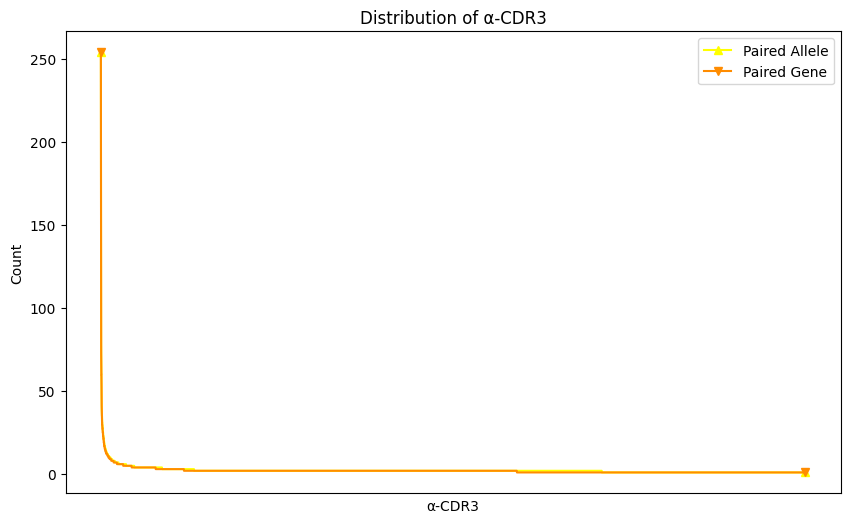

In [1028]:
# Count the occurrences of each CDr3
cdr_counts_paired_allele = df_paired_allele['TRA_CDR3'].value_counts()
cdr_counts_paired_gene = df_paired_gene['TRA_CDR3'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele = len(cdr_counts_paired_allele) - 1
last_index_paired_gene = len(cdr_counts_paired_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
cdr_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele])
cdr_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene])
plt.xlabel('α-CDR3')
plt.ylabel('Count')
plt.title(f'Distribution of α-CDR3')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

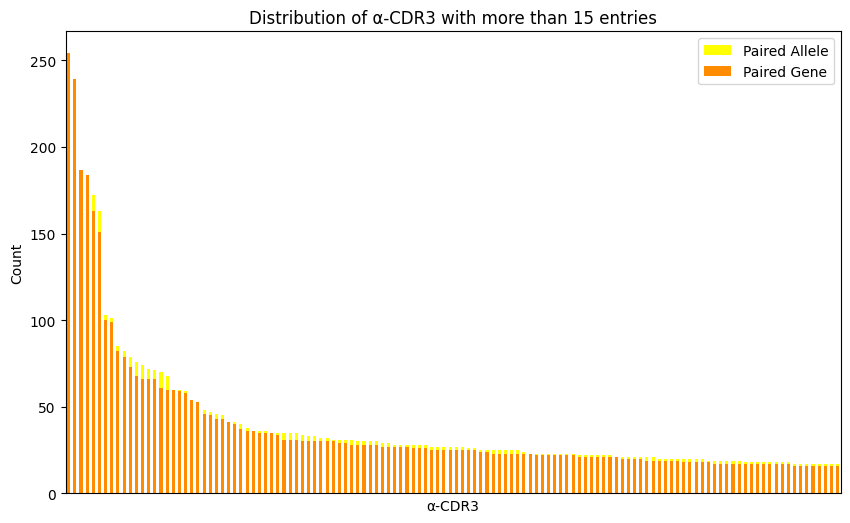

In [1029]:
# Count the occurrences of each CDr3
cdr_counts_paired_allele = df_paired_allele['TRA_CDR3'].value_counts()
cdr_counts_paired_gene = df_paired_gene['TRA_CDR3'].value_counts()

count_limit = 15
cdr_counts_paired_allele = cdr_counts_paired_allele[cdr_counts_paired_allele > count_limit]
cdr_counts_paired_gene = cdr_counts_paired_gene[cdr_counts_paired_gene > count_limit]

# Get the index of the last point for each series
last_index_paired_allele = len(cdr_counts_paired_allele) - 1
last_index_paired_gene = len(cdr_counts_paired_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
cdr_counts_paired_allele.plot(kind='bar', color=paired_allele_color, label='Paired Allele')
cdr_counts_paired_gene.plot(kind='bar', color=paired_gene_color, label='Paired Gene')
plt.xlabel('α-CDR3')
plt.ylabel('Count')
plt.title(f'Distribution of α-CDR3 with more than {count_limit} entries')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

#### beta chain

AMOUNT OF BARS: 36


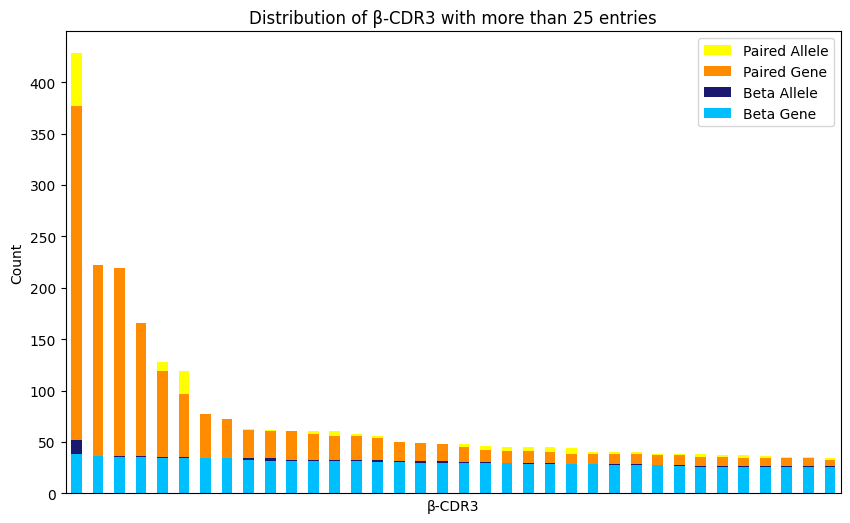

amount of bars:  36


In [1030]:
# Count the occurrences of each CDr3
cdr_counts_paired_allele = df_paired_allele['TRB_CDR3'].value_counts()
cdr_counts_paired_gene = df_paired_gene['TRB_CDR3'].value_counts()
cdr_counts_beta_allele = df_beta_allele['TRB_CDR3'].value_counts()
cdr_counts_beta_gene = df_beta_gene['TRB_CDR3'].value_counts()

count_limit = 25
cdr_counts_paired_allele = cdr_counts_paired_allele[cdr_counts_paired_allele > count_limit]
cdr_counts_paired_gene = cdr_counts_paired_gene[cdr_counts_paired_gene > count_limit]
cdr_counts_beta_allele = cdr_counts_beta_allele[cdr_counts_beta_allele > count_limit]
cdr_counts_beta_gene = cdr_counts_beta_gene[cdr_counts_beta_gene > count_limit]
amount_of_bars = min(len(cdr_counts_paired_allele), len(cdr_counts_paired_gene), len(cdr_counts_beta_allele), len(cdr_counts_beta_gene))
print(f"AMOUNT OF BARS: {amount_of_bars}")

# Get the index of the last point for each series
last_index_paired_allele = len(cdr_counts_paired_allele) - 1
last_index_paired_gene = len(cdr_counts_paired_gene) - 1
last_index_beta_allele = len(cdr_counts_beta_allele) - 1
last_index_beta_gene = len(cdr_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
cdr_counts_paired_allele.plot(kind='bar', color=paired_allele_color, label='Paired Allele')
cdr_counts_paired_gene.plot(kind='bar', color=paired_gene_color, label='Paired Gene')
cdr_counts_beta_allele.plot(kind='bar', color=beta_allele_color, label='Beta Allele')
cdr_counts_beta_gene.plot(kind='bar', color=beta_gene_color, label='Beta Gene')
plt.xlabel('β-CDR3')
plt.ylabel('Count')
plt.title(f'Distribution of β-CDR3 with more than {count_limit} entries')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()
print("amount of bars: ", amount_of_bars)

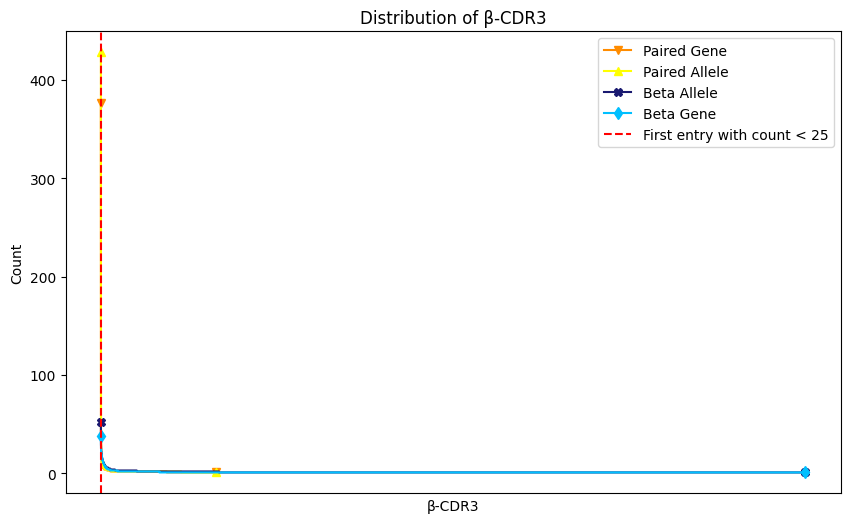

In [1031]:
# Count the occurrences of each CDr3
cdr_counts_paired_allele = df_paired_allele['TRB_CDR3'].value_counts()
cdr_counts_paired_gene = df_paired_gene['TRB_CDR3'].value_counts()
cdr_counts_beta_allele = df_beta_allele['TRB_CDR3'].value_counts()
cdr_counts_beta_gene = df_beta_gene['TRB_CDR3'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele = len(cdr_counts_paired_allele) - 1
last_index_paired_gene = len(cdr_counts_paired_gene) - 1
last_index_beta_allele = len(cdr_counts_beta_allele) - 1
last_index_beta_gene = len(cdr_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
cdr_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene])
cdr_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele])
cdr_counts_beta_allele.plot(kind='line', color=beta_allele_color, label='Beta Allele', marker=beta_allele_marker, markevery=[0, last_index_beta_allele])
cdr_counts_beta_gene.plot(kind='line', color=beta_gene_color, label='Beta Gene', marker=beta_gene_marker, markevery=[0, last_index_beta_gene])
plt.axvline(x=amount_of_bars, color='red', linestyle='--', label=f'First entry with count < {count_limit}')
plt.xlabel('β-CDR3')
plt.ylabel('Count')
plt.title(f'Distribution of β-CDR3')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

## VJ Region

### V Region

#### alpha chain

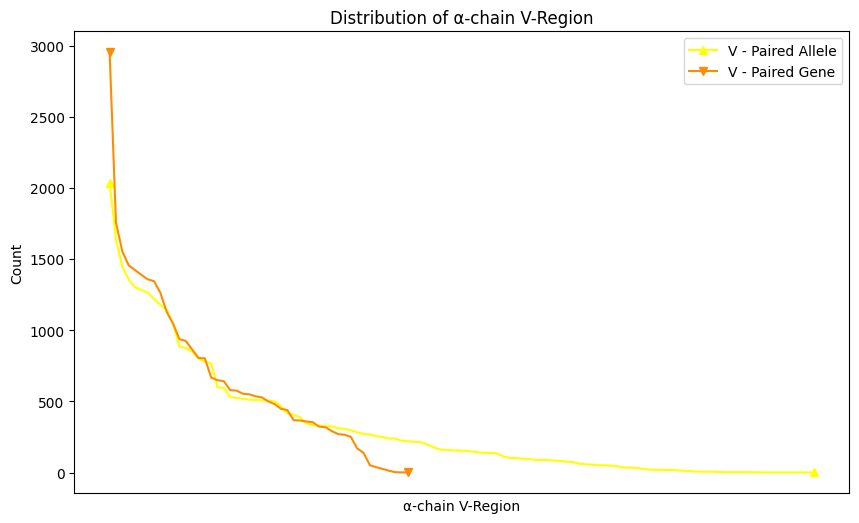

In [1032]:
v_counts_paired_allele = df_paired_allele['TRAV'].value_counts()
v_counts_paired_gene = df_paired_gene['TRAV'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele_v = len(v_counts_paired_allele) - 1
last_index_paired_gene_v = len(v_counts_paired_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
v_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='V - Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele_v])
v_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='V - Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene_v])
# v_counts_paired_gene.plot(kind='bar', color=paired_gene_color, label='V - Paired Gene')
# v_counts_paired_allele.plot(kind='bar', color=paired_allele_color, label='V - Paired Allele')

plt.xlabel('α-chain V-Region')
plt.ylabel('Count')
plt.title(f'Distribution of α-chain V-Region')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

#### beta chain

AMOUNT OF BARS: 44
v_counts_paired_allele: 68
v_counts_paired_gene: 44
v_counts_beta_allele: 96
v_counts_beta_gene: 52


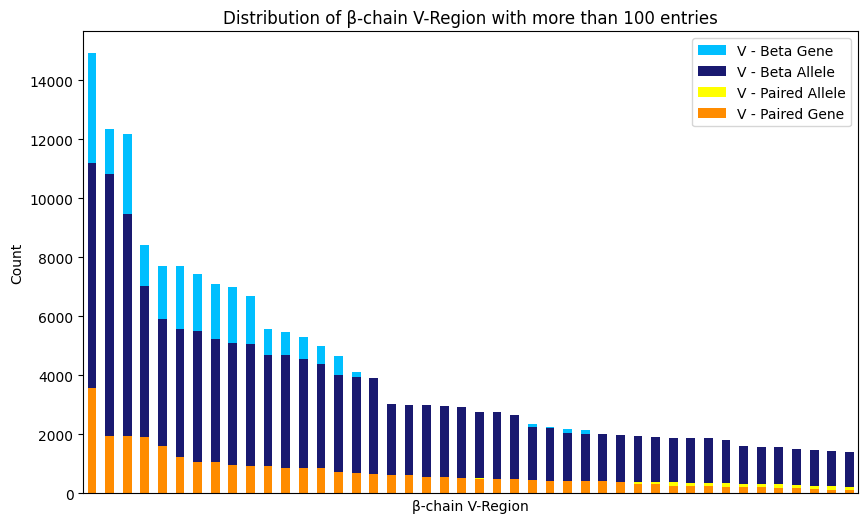

In [1033]:
v_counts_paired_allele = df_paired_allele['TRBV'].value_counts()
v_counts_paired_gene = df_paired_gene['TRBV'].value_counts()
v_counts_beta_allele = df_beta_allele['TRBV'].value_counts()
v_counts_beta_gene = df_beta_gene['TRBV'].value_counts()

count_limit = 100
v_counts_paired_allele = v_counts_paired_allele[v_counts_paired_allele > count_limit]
v_counts_paired_gene = v_counts_paired_gene[v_counts_paired_gene > count_limit]
v_counts_beta_allele = v_counts_beta_allele[v_counts_beta_allele > count_limit]
v_counts_beta_gene = v_counts_beta_gene[v_counts_beta_gene > count_limit]

amount_of_bars = min(len(v_counts_paired_allele), len(v_counts_paired_gene), len(v_counts_beta_allele), len(v_counts_beta_gene))
print(f"AMOUNT OF BARS: {amount_of_bars}")
print(f"v_counts_paired_allele: {len(v_counts_paired_allele)}")
print(f"v_counts_paired_gene: {len(v_counts_paired_gene)}")
print(f"v_counts_beta_allele: {len(v_counts_beta_allele)}")
print(f"v_counts_beta_gene: {len(v_counts_beta_gene)}")


# Get the index of the last point for each series
last_index_paired_allele_v = len(v_counts_paired_allele) - 1
last_index_paired_gene_v = len(v_counts_paired_gene) - 1
last_index_beta_allele_v = len(v_counts_beta_allele) - 1
last_index_beta_gene_v = len(v_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
v_counts_beta_gene.plot(kind='bar', color=beta_gene_color, label='V - Beta Gene')
v_counts_beta_allele.plot(kind='bar', color=beta_allele_color, label='V - Beta Allele')
v_counts_paired_allele.plot(kind='bar', color=paired_allele_color, label='V - Paired Allele')
v_counts_paired_gene.plot(kind='bar', color=paired_gene_color, label='V - Paired Gene')
plt.xlabel('β-chain V-Region')
plt.ylabel('Count')
plt.title(f'Distribution of β-chain V-Region with more than {count_limit} entries')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

#68

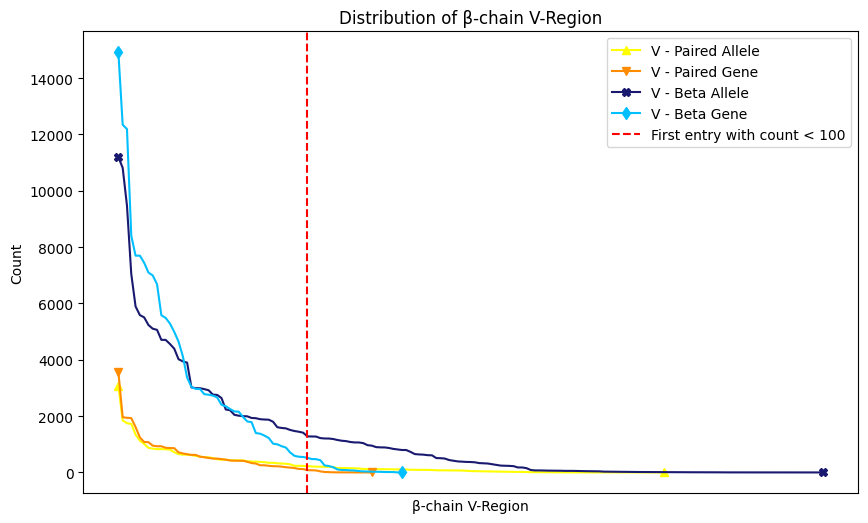

In [1034]:
v_counts_paired_allele = df_paired_allele['TRBV'].value_counts()
v_counts_paired_gene = df_paired_gene['TRBV'].value_counts()
v_counts_beta_allele = df_beta_allele['TRBV'].value_counts()
v_counts_beta_gene = df_beta_gene['TRBV'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele_v = len(v_counts_paired_allele) - 1
last_index_paired_gene_v = len(v_counts_paired_gene) - 1
last_index_beta_allele_v = len(v_counts_beta_allele) - 1
last_index_beta_gene_v = len(v_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
v_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='V - Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele_v])
v_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='V - Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene_v])
v_counts_beta_allele.plot(kind='line', color=beta_allele_color, label='V - Beta Allele', marker=beta_allele_marker, markevery=[0, last_index_beta_allele_v])
v_counts_beta_gene.plot(kind='line', color=beta_gene_color, label='V - Beta Gene', marker=beta_gene_marker, markevery=[0, last_index_beta_gene_v])
plt.axvline(x=amount_of_bars, color='red', linestyle='--', label=f'First entry with count < {count_limit}')
plt.xlabel('β-chain V-Region')
plt.ylabel('Count')
plt.title(f'Distribution of β-chain V-Region')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

### J Region

#### alpha chain

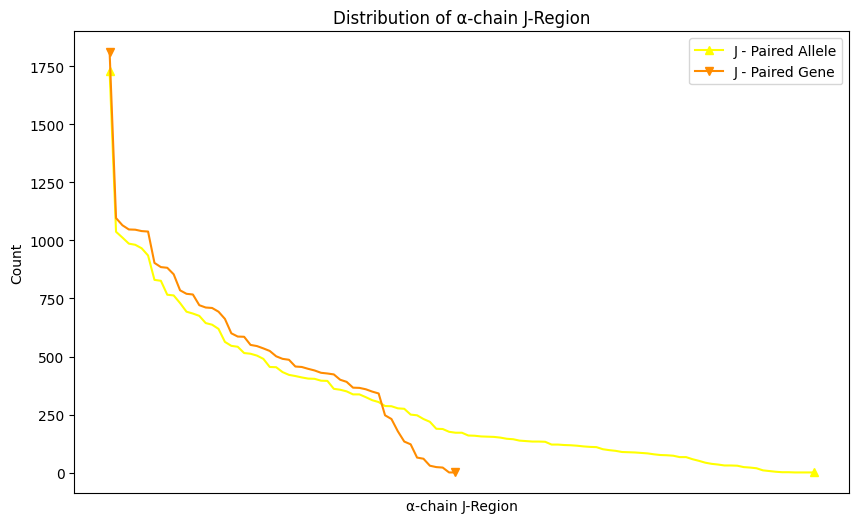

In [1035]:
j_counts_paired_allele = df_paired_allele['TRAJ'].value_counts()
j_counts_paired_gene = df_paired_gene['TRAJ'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele_j = len(j_counts_paired_allele) - 1
last_index_paired_gene_j = len(j_counts_paired_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
j_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='J - Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele_j])
j_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='J - Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene_j])
plt.xlabel('α-chain J-Region')
plt.ylabel('Count')
plt.title(f'Distribution of α-chain J-Region')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

#### beta chain

AMOUNT OF BARS: 11


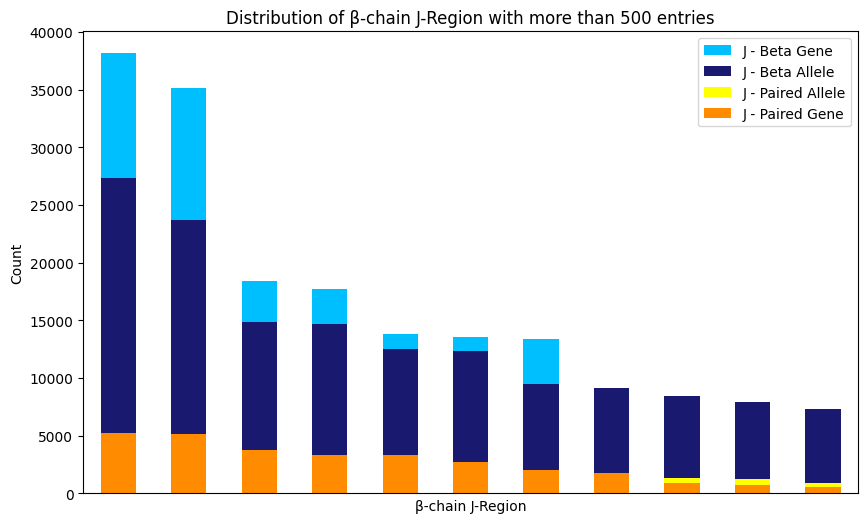

In [1036]:
j_counts_paired_allele = df_paired_allele['TRBJ'].value_counts()
j_counts_paired_gene = df_paired_gene['TRBJ'].value_counts()
j_counts_beta_allele = df_beta_allele['TRBJ'].value_counts()
j_counts_beta_gene = df_beta_gene['TRBJ'].value_counts()

count_limit = 500
j_counts_paired_allele = j_counts_paired_allele[j_counts_paired_allele > count_limit]
j_counts_paired_gene = j_counts_paired_gene[j_counts_paired_gene > count_limit]
j_counts_beta_allele = j_counts_beta_allele[j_counts_beta_allele > count_limit]
j_counts_beta_gene = j_counts_beta_gene[j_counts_beta_gene > count_limit]
amount_of_bars = min(len(j_counts_paired_allele), len(j_counts_paired_gene), len(j_counts_beta_allele), len(j_counts_beta_gene))
print(f"AMOUNT OF BARS: {amount_of_bars}")

# Get the index of the last point for each series
last_index_paired_allele_j = len(j_counts_paired_allele) - 1
last_index_paired_gene_j = len(j_counts_paired_gene) - 1
last_index_beta_allele_j = len(j_counts_beta_allele) - 1
last_index_beta_gene_j = len(j_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
j_counts_beta_gene.plot(kind='bar', color=beta_gene_color, label='J - Beta Gene')
j_counts_beta_allele.plot(kind='bar', color=beta_allele_color, label='J - Beta Allele')
j_counts_paired_allele.plot(kind='bar', color=paired_allele_color, label='J - Paired Allele')
j_counts_paired_gene.plot(kind='bar', color=paired_gene_color, label='J - Paired Gene')
plt.xlabel('β-chain J-Region')
plt.ylabel('Count')
plt.title(f'Distribution of β-chain J-Region with more than {count_limit} entries')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

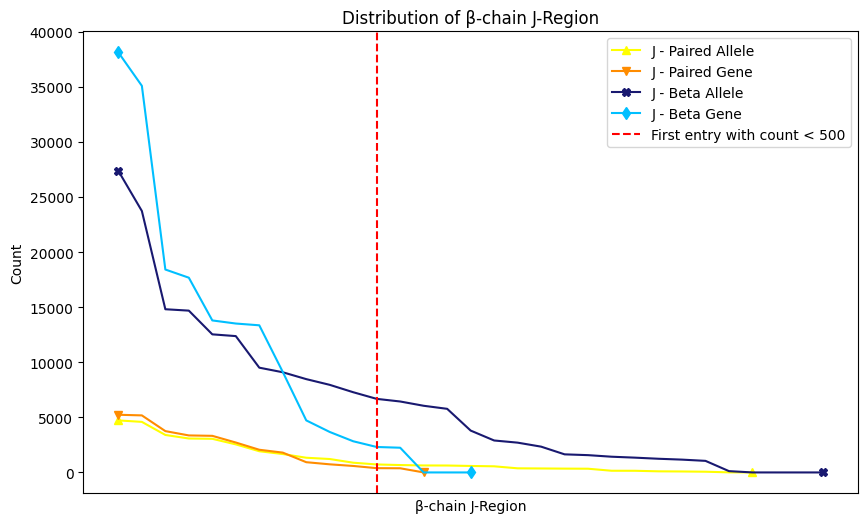

In [1037]:
j_counts_paired_allele = df_paired_allele['TRBJ'].value_counts()
j_counts_paired_gene = df_paired_gene['TRBJ'].value_counts()
j_counts_beta_allele = df_beta_allele['TRBJ'].value_counts()
j_counts_beta_gene = df_beta_gene['TRBJ'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele_j = len(j_counts_paired_allele) - 1
last_index_paired_gene_j = len(j_counts_paired_gene) - 1
last_index_beta_allele_j = len(j_counts_beta_allele) - 1
last_index_beta_gene_j = len(j_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
j_counts_paired_allele.plot(kind='line', color=paired_allele_color, label='J - Paired Allele', marker=paired_allele_marker, markevery=[0, last_index_paired_allele_j])
j_counts_paired_gene.plot(kind='line', color=paired_gene_color, label='J - Paired Gene', marker=paired_gene_marker, markevery=[0, last_index_paired_gene_j])
j_counts_beta_allele.plot(kind='line', color=beta_allele_color, label='J - Beta Allele', marker=beta_allele_marker, markevery=[0, last_index_beta_allele_j])
j_counts_beta_gene.plot(kind='line', color=beta_gene_color, label='J - Beta Gene', marker=beta_gene_marker, markevery=[0, last_index_beta_gene_j])
plt.axvline(x=amount_of_bars, color='red', linestyle='--', label=f'First entry with count < {count_limit}')
plt.xlabel('β-chain J-Region')
plt.ylabel('Count')
plt.title(f'Distribution of β-chain J-Region')
plt.xticks([])
plt.legend()  # Display the legend with custom labels
plt.show()

## MHC

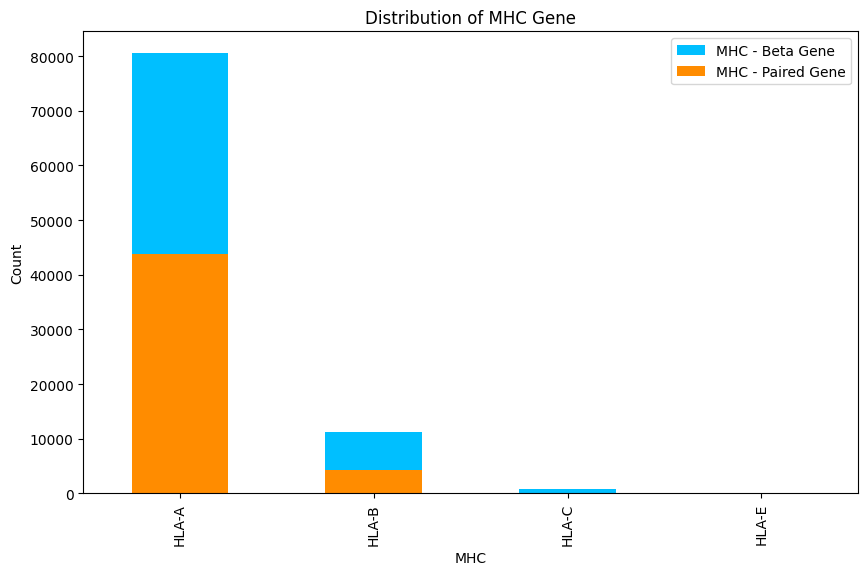

In [1038]:
# Count the occurrences of each MHC
mhc_counts_paired_allele = df_paired_allele['MHC'].value_counts()
mhc_counts_paired_gene = df_paired_gene['MHC'].value_counts()
mhc_counts_beta_allele = df_beta_allele['MHC'].value_counts()
mhc_counts_beta_gene = df_beta_gene['MHC'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele = len(mhc_counts_paired_allele) - 1
last_index_paired_gene = len(mhc_counts_paired_gene) - 1
last_index_beta_allele = len(mhc_counts_beta_allele) - 1
last_index_beta_gene = len(mhc_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
#mhc_counts_paired_gene.plot(kind='line', label='MHC - Paired Gene', color=paired_gene_color, marker=paired_gene_marker, markevery=[0, last_index_paired_gene])
mhc_counts_beta_gene.plot(kind='bar', label='MHC - Beta Gene', color=beta_gene_color)
mhc_counts_paired_gene.plot(kind='bar', label='MHC - Paired Gene', color=paired_gene_color)
#mhc_counts_beta_gene.plot(kind='line', label='MHC - Beta Gene', color=beta_gene_color, marker=beta_gene_marker, markevery=[0, last_index_beta_gene])
plt.xlabel('MHC')
plt.ylabel('Count')
plt.title(f'Distribution of MHC Gene')
plt.legend()  # Display the legend with custom labels
plt.xticks()
plt.show()

AMOUNT OF BARS: 25


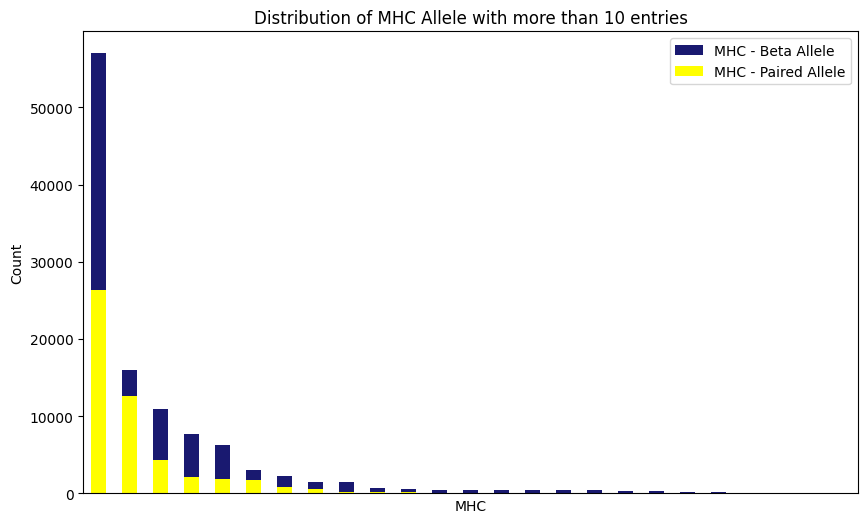

In [1039]:
# Count the occurrences of each MHC
mhc_counts_paired_allele = df_paired_allele['MHC'].value_counts()
mhc_counts_beta_allele = df_beta_allele['MHC'].value_counts()

count_limit = 10
mhc_counts_paired_allele = mhc_counts_paired_allele[mhc_counts_paired_allele > count_limit]
mhc_counts_beta_allele = mhc_counts_beta_allele[mhc_counts_beta_allele > count_limit]
amount_of_bars = min(len(mhc_counts_paired_allele), len(mhc_counts_beta_allele))
print(f"AMOUNT OF BARS: {amount_of_bars}")

# Get the index of the last point for each series
last_index_paired_allele = len(mhc_counts_paired_allele) - 1
last_index_beta_allele = len(mhc_counts_beta_allele) - 1

# Plotting
plt.figure(figsize=(10, 6))
mhc_counts_beta_allele.plot(kind='bar', label='MHC - Beta Allele', color=beta_allele_color)
mhc_counts_paired_allele.plot(kind='bar', label='MHC - Paired Allele', color=paired_allele_color)
plt.xlabel('MHC')
plt.ylabel('Count')
plt.title(f'Distribution of MHC Allele with more than {count_limit} entries')
plt.legend()  # Display the legend with custom labels
plt.xticks([])
plt.show()

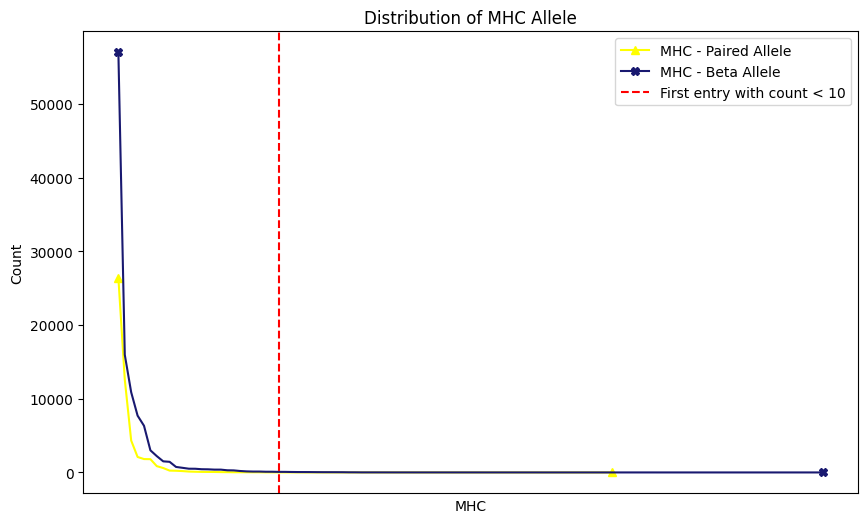

In [1040]:
# Count the occurrences of each MHC
mhc_counts_paired_allele = df_paired_allele['MHC'].value_counts()
mhc_counts_beta_allele = df_beta_allele['MHC'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele = len(mhc_counts_paired_allele) - 1
last_index_beta_allele = len(mhc_counts_beta_allele) - 1

# Plotting
plt.figure(figsize=(10, 6))
mhc_counts_paired_allele.plot(kind='line', label='MHC - Paired Allele', color=paired_allele_color, marker=paired_allele_marker, markevery=[0, last_index_paired_allele])
mhc_counts_beta_allele.plot(kind='line', label='MHC - Beta Allele', color=beta_allele_color, marker=beta_allele_marker, markevery=[0, last_index_beta_allele])
plt.axvline(x=amount_of_bars, color='red', linestyle='--', label=f'First entry with count < {count_limit}')
plt.xlabel('MHC')
plt.ylabel('Count')
plt.title(f'Distribution of MHC Allele')
plt.legend()  # Display the legend with custom labels
plt.xticks([])
plt.show()

## Epitope

AMOUNT OF BARS : 24


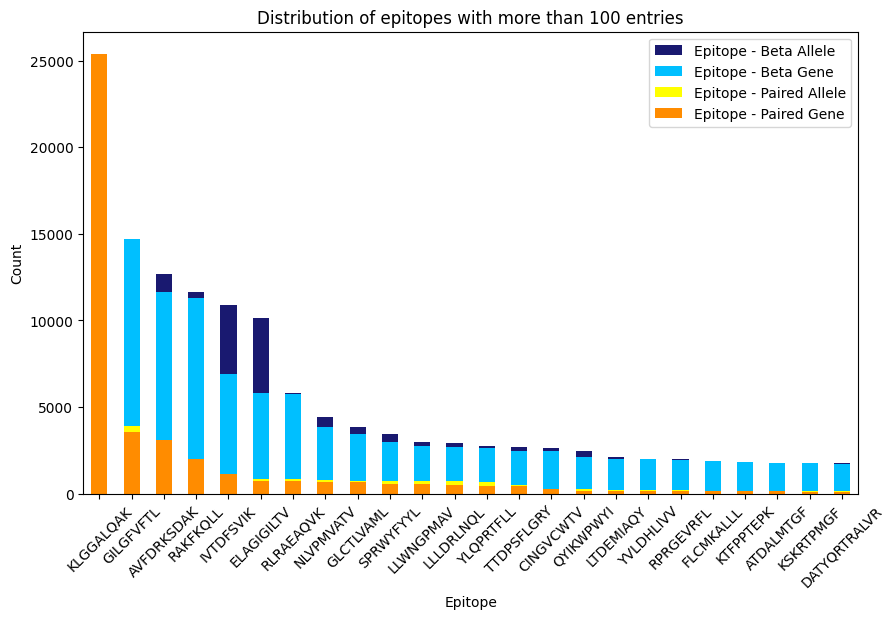

In [1043]:
# Count the occurrences of each Epitope
epitope_counts_paired_allele = df_paired_allele['Epitope'].value_counts()
epitope_counts_paired_gene = df_paired_gene['Epitope'].value_counts()
epitope_counts_beta_allele = df_beta_allele['Epitope'].value_counts()
epitope_counts_beta_gene = df_beta_gene['Epitope'].value_counts()

count_limit = 100
epitope_counts_beta_allele = epitope_counts_beta_allele[epitope_counts_beta_allele > count_limit]
epitope_counts_beta_gene = epitope_counts_beta_gene[epitope_counts_beta_gene > count_limit]
epitope_counts_paired_allele = epitope_counts_paired_allele[epitope_counts_paired_allele > count_limit]
epitope_counts_paired_gene = epitope_counts_paired_gene[epitope_counts_paired_gene > count_limit]
amount_of_bars = min(len(epitope_counts_beta_allele), len(epitope_counts_beta_gene), len(epitope_counts_paired_allele), len(epitope_counts_paired_gene))
print(f"AMOUNT OF BARS : {amount_of_bars}")

# Filter Epitopes that have more than 2 entries
#filtered_epitope_counts = epitope_counts[epitope_counts > 50]

# Get the index of the last point for each series
last_index_paired_allele = len(epitope_counts_paired_allele) - 1
last_index_paired_gene = len(epitope_counts_paired_gene) - 1
last_index_beta_allele = len(epitope_counts_beta_allele) - 1
last_index_beta_gene = len(epitope_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
epitope_counts_beta_allele.plot(kind='bar', label='Epitope - Beta Allele', color=beta_allele_color)
epitope_counts_beta_gene.plot(kind='bar', label='Epitope - Beta Gene', color=beta_gene_color)
epitope_counts_paired_allele.plot(kind='bar', label='Epitope - Paired Allele', color=paired_allele_color)
epitope_counts_paired_gene.plot(kind='bar', label='Epitope - Paired Gene', color=paired_gene_color)
plt.xlabel('Epitope')
plt.ylabel('Count')
plt.title(f'Distribution of epitopes with more than {count_limit} entries')
plt.xticks(rotation=45)
plt.legend()
# plt.xticks([])
plt.show()

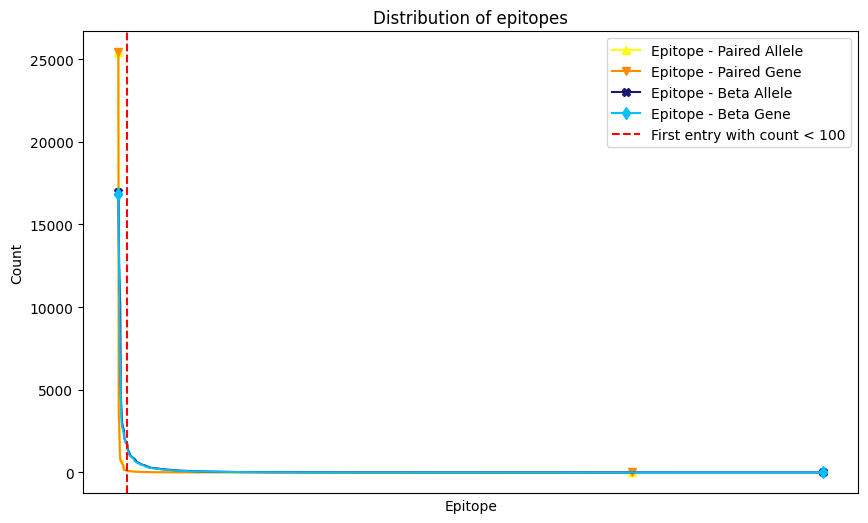

In [1042]:
# Count the occurrences of each Epitope
epitope_counts_paired_allele = df_paired_allele['Epitope'].value_counts()
epitope_counts_paired_gene = df_paired_gene['Epitope'].value_counts()
epitope_counts_beta_allele = df_beta_allele['Epitope'].value_counts()
epitope_counts_beta_gene = df_beta_gene['Epitope'].value_counts()

# Get the index of the last point for each series
last_index_paired_allele = len(epitope_counts_paired_allele) - 1
last_index_paired_gene = len(epitope_counts_paired_gene) - 1
last_index_beta_allele = len(epitope_counts_beta_allele) - 1
last_index_beta_gene = len(epitope_counts_beta_gene) - 1

# Plotting
plt.figure(figsize=(10, 6))
epitope_counts_paired_allele.plot(kind='line', label='Epitope - Paired Allele', color=paired_allele_color, marker=paired_allele_marker, markevery=[0, last_index_paired_allele])
epitope_counts_paired_gene.plot(kind='line', label='Epitope - Paired Gene', color=paired_gene_color, marker=paired_gene_marker, markevery=[0, last_index_paired_gene])
epitope_counts_beta_allele.plot(kind='line', label='Epitope - Beta Allele', color=beta_allele_color, marker=beta_allele_marker, markevery=[0, last_index_beta_allele])
epitope_counts_beta_gene.plot(kind='line', label='Epitope - Beta Gene', color=beta_gene_color, marker=beta_gene_marker, markevery=[0, last_index_beta_gene])
plt.axvline(x=amount_of_bars, color='red', linestyle='--', label=f'First entry with count < {count_limit}')
plt.xlabel('Epitope')
plt.ylabel('Count')
plt.title(f'Distribution of epitopes')
#plt.xticks(rotation=45)
plt.legend()
plt.xticks([])
plt.show()